In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter

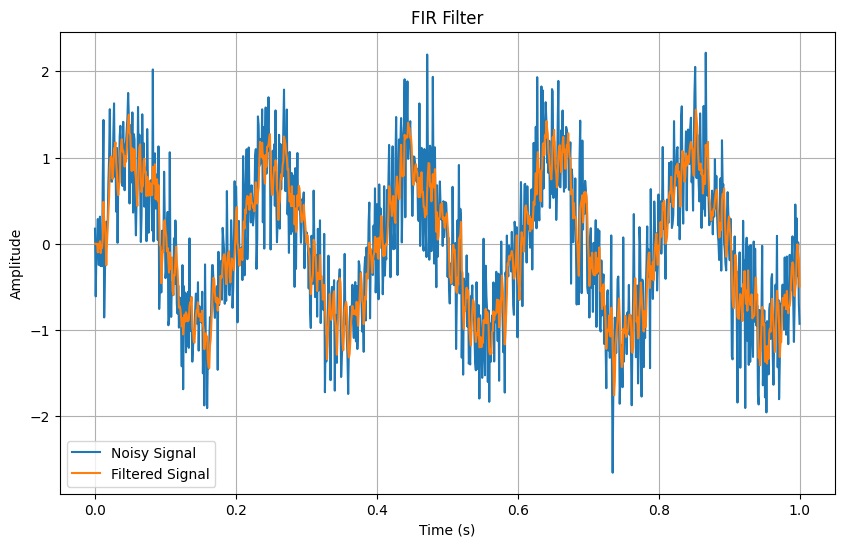

In [2]:
def fir_filter(x,b):
    M = len(b)
    y = np.zeros(len(x))
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n-M+1:n+1][::-1])
    return y

fs = 1000
t = np.linspace(0, 1, fs)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))
b = [0.25,0.25,0.25,0.25]
y = fir_filter(x, b)

plt.figure(figsize=(10,6))
plt.plot(t,x,label='Noisy Signal')
plt.plot(t,y,label='Filtered Signal')
plt.legend()
plt.title('FIR Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

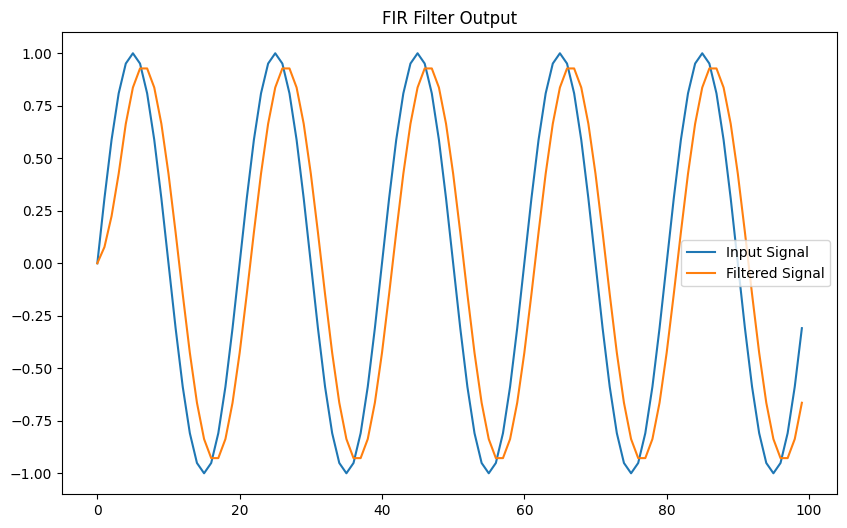

In [3]:
#FIR Filter using Scipy
def fir_filter(b, x):
    M = len(b) 
    y = np.convolve(x, b, mode='full')[:len(x)] 
    return y

b = [0.25,0.25,0.25,0.25]  
x = np.sin(2 * np.pi * 0.05 * np.arange(100))

y = fir_filter(b, x)

plt.figure(figsize=(10, 6))
plt.plot(x, label="Input Signal")
plt.plot(y, label="Filtered Signal")
plt.legend()
plt.title("FIR Filter Output")
plt.show()

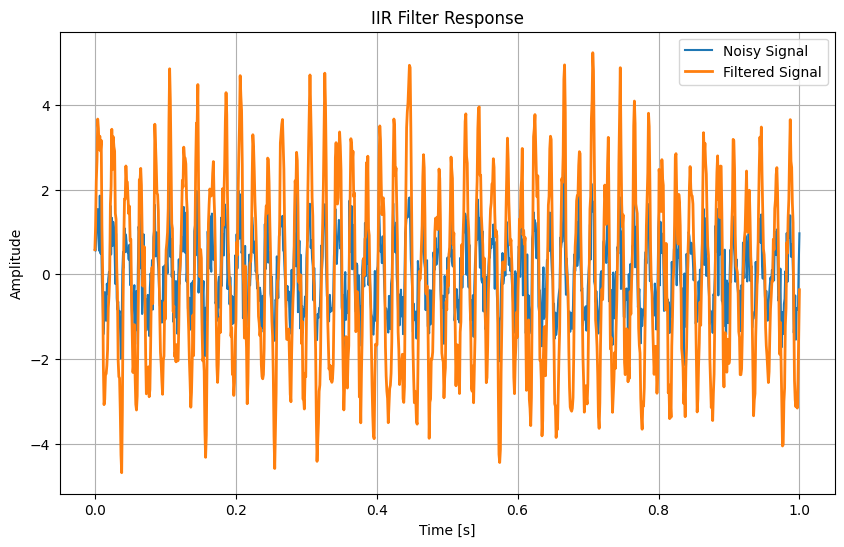

In [ ]:
def iir_filter(x, b, a):
    M = len(b)  
    N = len(a)  
    y = np.zeros(len(x))  
    for n in range(len(x)):  
        x_slice = x[max(0, n-M+1):n+1]  
        y[n] = np.dot(b[:len(x_slice)], x_slice[::-1])  
    if n >= 1:  
        y_slice = y[max(0, n-N+1):n]  
        y[n] -= np.dot(a[1:min(N, len(y_slice)+1)], y_slice[::-1])  
    return y


fs = 1000
t = np.linspace(0, 1, fs)
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.randn(len(t))
a = [1, -0.5]
b = [1,1,1]

y= iir_filter(x, b, a)

plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("IIR Filter Response")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

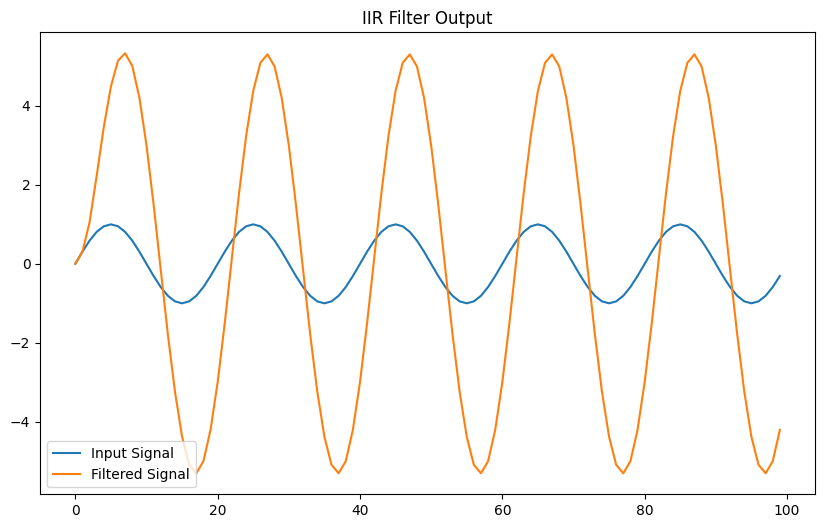

In [5]:
#Scipy lfilter

b = [1,1,1] 
a = [1,-0.5]

x = np.sin(2 * np.pi * 0.05 * np.arange(100))
y = lfilter(b, a, x)

plt.figure(figsize=(10, 6))
plt.plot(x, label="Input Signal")
plt.plot(y, label="Filtered Signal")
plt.legend()
plt.title("IIR Filter Output")
plt.show()


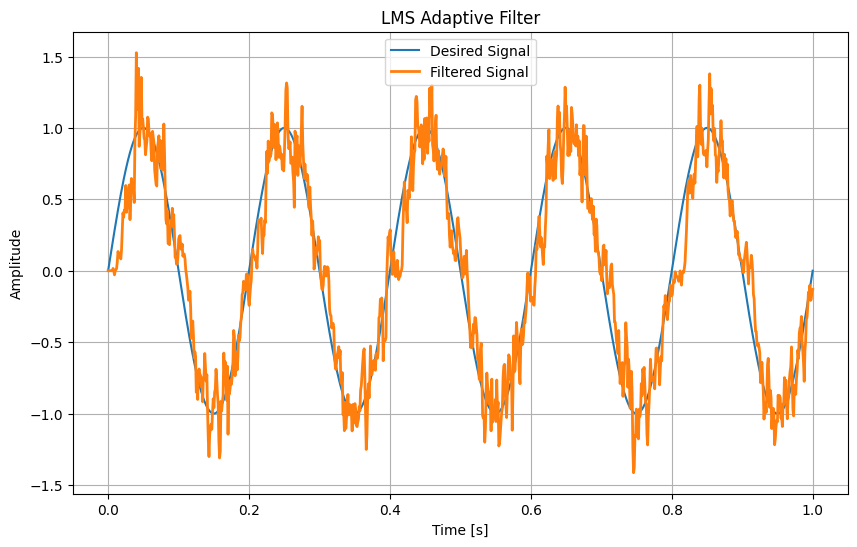

In [6]:
def lms_filter(x, d, mu, num_taps):
    n = len(x)
    w = np.zeros(num_taps)
    y = np.zeros(n)
    e = np.zeros(n)
    for i in range(num_taps, n):
        x_segment = x[i-num_taps:i]
        y[i] = np.dot(w, x_segment[::-1])
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment[::-1]
    return y, e, w

t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))
d = np.sin(2 * np.pi * 5 * t)

mu = 0.1
num_taps = 6

y, e, w = lms_filter(x, d, mu, num_taps)

plt.figure(figsize=(10, 6))
plt.plot(t, d, label="Desired Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("LMS Adaptive Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()
